In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Chargement du dataset
# file_path = r"C:\\Users\\dariu\\Desktop\\Anomaly-detection-in-Microservices-based-systems\\application anomalies dataset\\data1.csv"
file_path = r"C:\Users\dariu\Desktop\Anomaly-detection-in-Microservices-based-systems\service anomalies dataset\service_anomalies.csv" 
df = pd.read_csv(file_path)
df['Time'] = pd.to_datetime(df['Time'], format='mixed', errors='coerce')
df.set_index('Time', inplace=True)

In [15]:
# Normalisation des features
features = df.drop(columns=["IsError"])
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)


In [16]:
# Vraies étiquettes
labels = df["IsError"].astype(int).values

In [39]:
# Modèle Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination="auto", n_jobs=-1, verbose=1, random_state=42)
iso_forest.fit(scaled_df)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.3s remaining:    1.9s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.3s finished


IsolationForest(n_jobs=-1, random_state=42, verbose=1)

In [40]:
# Prédictions
y_pred = iso_forest.predict(scaled_df)
# -1 = Anomaly, 1 = Normal → on convertit vers 1 (anomalie), 0 (normal)
y_pred_binary = (y_pred == -1).astype(int)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [41]:
# Métriques
accuracy = accuracy_score(labels, y_pred_binary)
precision = precision_score(labels, y_pred_binary)
recall = recall_score(labels, y_pred_binary)
f1 = f1_score(labels, y_pred_binary)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.51
Precision: 0.52
Recall: 0.30
F1-Score: 0.38


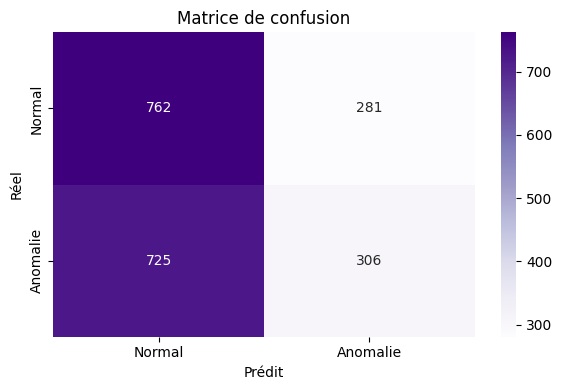

In [42]:
cm = confusion_matrix(labels, y_pred_binary)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=["Normal", "Anomalie"],
            yticklabels=["Normal", "Anomalie"])
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


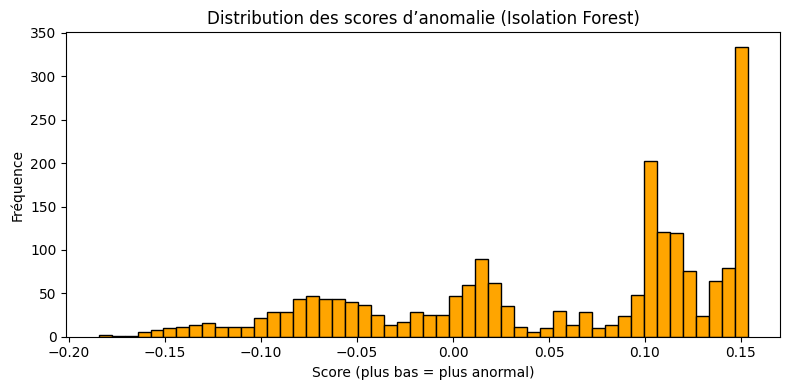

In [43]:
# Distribution des scores d’anomalie
scores = iso_forest.decision_function(scaled_df)
plt.figure(figsize=(8, 4))
plt.hist(scores, bins=50, color='orange', edgecolor='k')
plt.title("Distribution des scores d’anomalie (Isolation Forest)")
plt.xlabel("Score (plus bas = plus anormal)")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


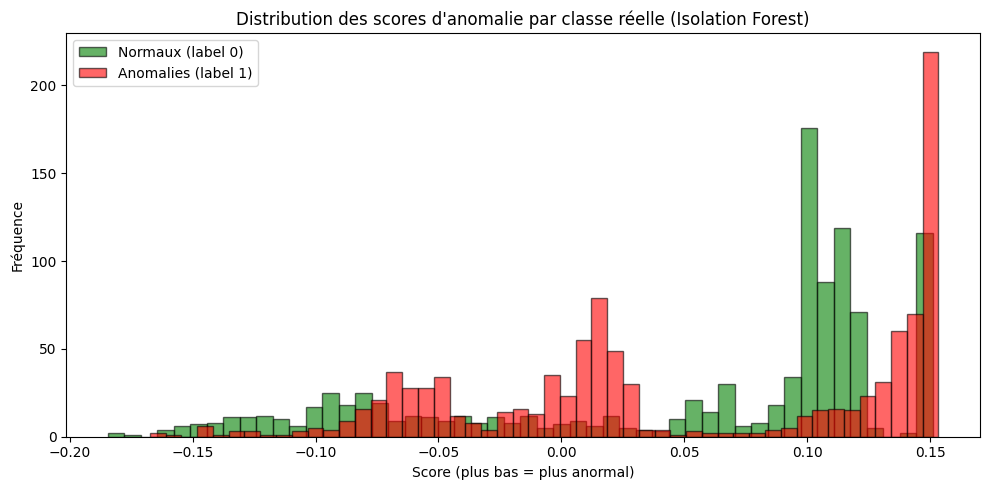

In [44]:
# Extraire les scores
scores = iso_forest.decision_function(scaled_df)

# Séparer selon la vérité terrain
scores_normaux = scores[labels == 0]
scores_anormaux = scores[labels == 1]

# Tracer l'histogramme
plt.figure(figsize=(10, 5))
plt.hist(scores_normaux, bins=50, alpha=0.6, label='Normaux (label 0)', color='green', edgecolor='k')
plt.hist(scores_anormaux, bins=50, alpha=0.6, label='Anomalies (label 1)', color='red', edgecolor='k')

plt.title("Distribution des scores d'anomalie par classe réelle (Isolation Forest)")
plt.xlabel("Score (plus bas = plus anormal)")
plt.ylabel("Fréquence")
plt.legend()
plt.tight_layout()
plt.show()
